In [ ]:
+import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("survey_data.csv")

In [ ]:
df=df.sort_values(by="App_name")
df

,Distance_km,Time_of_Day,Delivery_Time_min,App_name
0,4.30,Night,25,domino
28,1.02,Afternoon,34,domino
33,2.10,Evening,36,domino
36,2.09,Night,36,domino
39,4.80,Morning,47,domino
...,...,...,...,...
50,3.20,Night,42,zomato
51,6.30,Evening,111,zomato
52,11.90,Evening,69,zomato
12,3.60,Morning,28,zomato


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 38
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance_km        78 non-null     float64
 1   Time_of_Day        78 non-null     object 
 2   Delivery_Time_min  78 non-null     int64  
 3   App_name           78 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ KB


In [ ]:
df.describe()

,Distance_km,Delivery_Time_min
count,78.000000,78.000000
mean,6.027051,43.820513
std,2.942397,16.761694
min,1.020000,8.000000
25%,3.525000,31.000000
50%,5.950000,43.000000
75%,8.100000,52.000000
max,11.900000,111.000000


In [ ]:
domino_dist=[]
domino_time=[]
zomato_dist=[]
zomato_time=[]
swiggy_time=[]
swiggy_dist=[]
for i in df.index:
    if df.loc[i,"App_name"]=="domino":
        domino_dist.append(df.loc[i,"Distance_km"])
        domino_time.append(df.loc[i,"Delivery_Time_min"])
    elif df.loc[i,"App_name"]=="swiggy":
        swiggy_dist.append(df.loc[i,"Distance_km"])
        swiggy_time.append(df.loc[i,"Delivery_Time_min"])
    else:
        zomato_dist.append(df.loc[i,"Distance_km"])
        zomato_time.append(df.loc[i,"Delivery_Time_min"])
print("time takken by domino:",domino_time)
print()
print("time takken by swiggy:",swiggy_time)
print()
print("time takken by zomato:",zomato_time)


time takken by domino: [25, 34, 36, 36, 47, 50, 31, 38, 22, 32, 43, 28, 30, 45, 31, 37, 52, 44, 56, 30, 41, 38, 31, 34, 31, 30, 25, 24, 48]

time takken by swiggy: [20, 42, 40, 27, 31, 20, 58, 49, 48, 57, 79, 36, 43, 52, 45, 44, 69, 27, 25]

time takken by zomato: [35, 49, 57, 72, 44, 73, 35, 71, 28, 48, 73, 70, 45, 27, 47, 67, 8, 56, 46, 36, 44, 61, 60, 52, 47, 42, 111, 69, 28, 56]


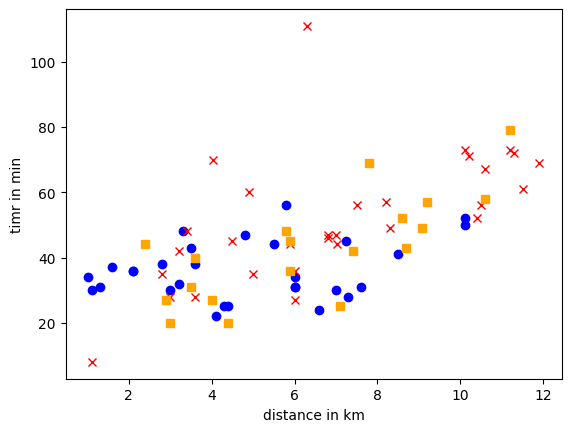

In [ ]:
plt.plot(domino_dist,domino_time,"o",color="blue")
plt.plot(zomato_dist,zomato_time,"x",color="red")
plt.plot(swiggy_dist,swiggy_time,"s",color="orange")
plt.xlabel("distance in km")
plt.ylabel("timr in min")
plt.show()

In [ ]:
print("average time takken in delivery by domino",np.mean(domino_time))
print("average time takken in delivery by swiggy",np.mean(zomato_time))
print("average time takken in delivery by zomato",np.mean(swiggy_time))

average time takken in delivery by domino 36.172413793103445
average time takken in delivery by swiggy 51.9
average time takken in delivery by zomato 42.73684210526316


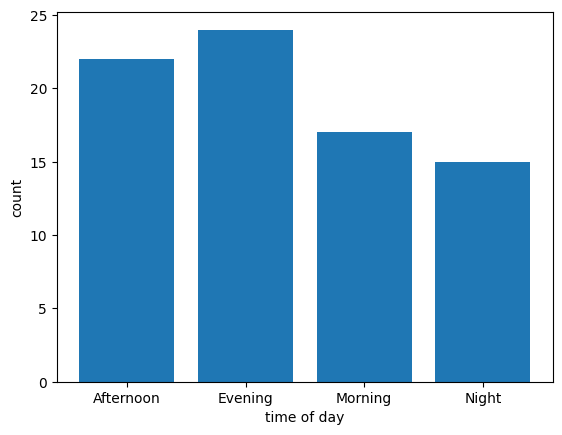

In [ ]:
new=df.groupby("Time_of_Day").count()
new.head()
plt.bar(new.index,new["Distance_km"])
plt.xlabel("time of day")
plt.ylabel("count")
plt.show()

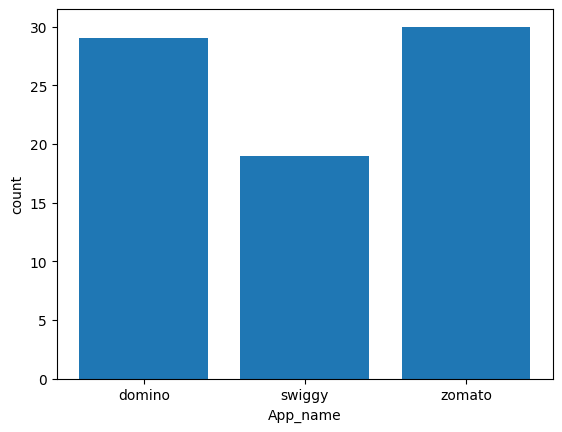

In [ ]:
new=df.groupby("App_name").count()
new.head()
plt.bar(new.index,new["Distance_km"])
plt.xlabel("App_name")
plt.ylabel("count")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df['Distance_km'].values.reshape(-1, 1)  # Predictor
y = df['Delivery_Time_min'].values          # Target

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]      # Slope of the regression line
intercept = model.intercept_  # Intercept of the regression line

# Print the equation
print(f"The regression line equation is: y = {slope:.2f}x + {intercept:.2f}")

The regression line equation is: y = 3.47x + 22.88


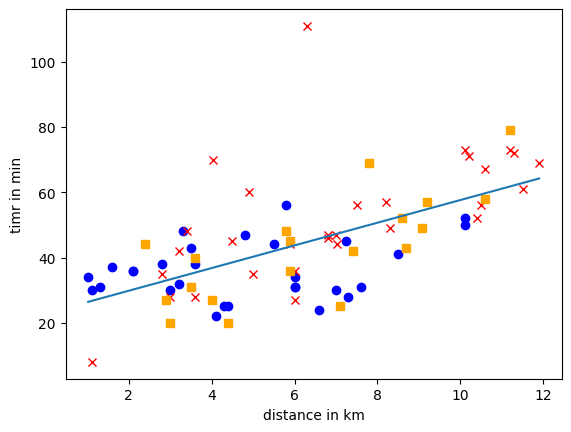

In [ ]:
plt.plot(domino_dist,domino_time,"o",color="blue")
plt.plot(zomato_dist,zomato_time,"x",color="red")
plt.plot(swiggy_dist,swiggy_time,"s",color="orange")
plt.plot(np.linspace(df['Distance_km'].min(), df['Distance_km'].max(),20), model.coef_[0]*(np.linspace(df['Distance_km'].min(), df['Distance_km'].max(),20))+model.intercept_)
plt.xlabel("distance in km")
plt.ylabel("timr in min")
plt.show()

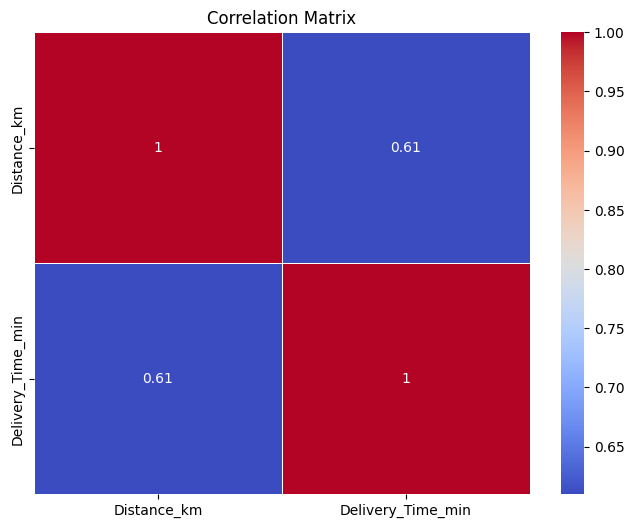

In [ ]:
newdf=df.copy()
newdf=newdf.drop(["Time_of_Day","App_name"],axis=1)
corr_matrix = newdf.corr()
import seaborn as sns
# Plot the correlation matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title and show the plot
plt.title("Correlation Matrix")
plt.show()